# National Health and Nutrition Examination Survey 
# (NHANES) 2015-2016
Enyel A. Rodríguez G. — Febrero 2024

----------

El NHANES es un programa de estudios diseñados para evaluar el estado nutricional de adultos y niños en los Estados Unidos que se realiza anualmente. Las entrevistas de NHANES incluyen preguntas demográficas, socioeconómicas, dietéticas y relacionadas con la salud.

Antes de ejecutar un plan de análisis **es muy importante tomar en cuenta las características de la muestra** y **la distribución de los datos**. Por ejemplo, si analizamos una muestra estratificada como una muestra simple aleatoria, existe un riesgo que nuestro análisis refleje parámetros incorrectos y pruebas de hipótesis optimistas que no son representativas de la población real.

Para fines demostrativos asumiremos que el conjunto de datos del NHANES 2015-2016 proviene de una muestra simple aleatoria y se realizarán análisis bajo esta premisa. Posteriormente, a través de modelos de regresión, se realizará análisis en el contexto de una muestra estratificada.

En este cuaderno se muestran algunas capacidades de las bibliotecas de Python para análisis estadístico. Puedes consultar el [libro de códigos del NHANES](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#Codebook) para una descripción detallada de las variables contenidas en la base de datos. Para poder empezar, después de importar el archivo csv, vamos a importar varias bibliotecas de Python que nos serán de utilidad para el análisis.

In [ ]:
# Crea una lista de archivos en el directorio de Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

# Este es el directorio donde se encuentra el archivo csv
%cd My\ Drive/Colab/Portfolio/NHANES\ 2015-2016
%ls

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import add_lowess
import scipy.stats
import seaborn as sns

da = pd.read_csv("nhanes_2015_2016.csv")

# Imprime una lista de columnas del dataframe
print(da.columns)

# Imprime el tamaño del dataframe (filas, columnas)
da.shape

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')


(5735, 28)

## Estadísticos descriptivos

----------

Podemos obtener estadísticos descriptivos del conjunto de datos sobre las variables cuantitativas edad ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), peso ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)), altura ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) e índice de masa corporal ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) utilizando `describe()`.

In [3]:
# Describe las variables RIDAGEYR, BMXWT, BMXHT, BMXBMI
da[["RIDAGEYR", "BMXWT", "BMXHT", "BMXBMI"]].describe()

,RIDAGEYR,BMXWT,BMXHT,BMXBMI
count,5735.000000,5666.000000,5673.000000,5662.000000
mean,48.052310,81.342676,166.142834,29.382197
std,18.431011,21.764409,10.079264,7.095921
min,18.000000,32.400000,129.700000,14.500000
25%,32.000000,65.900000,158.700000,24.300000
50%,48.000000,78.200000,166.000000,28.300000
75%,63.000000,92.700000,173.500000,33.000000
max,80.000000,198.900000,202.700000,67.300000


La media de edad de este conjunto de datos es de 48,1 años, con una desviación estándar de $\pm$ 18.4 años, con un mínimo de 18 años y un máximo de 80 años. También podemos ver los valores del primer y tercer cuartil para la edad ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)). Los parámetros mencionados anteriormente también se pueden ver para el peso ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)), la altura ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) y el índice de masa corporal ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)).

Podemos crear un histograma de la distribución del peso ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)) con la biblioteca seaborn, para el conjunto de datos completo y también separarlo por género ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)).

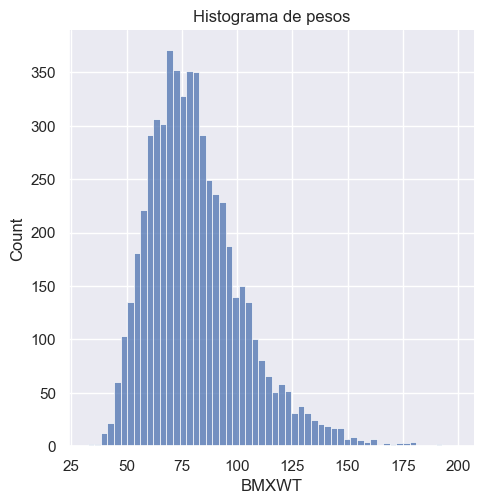

In [4]:
sns.set_theme()
sns.displot(da["BMXWT"].dropna()).set(title='Histograma de pesos')

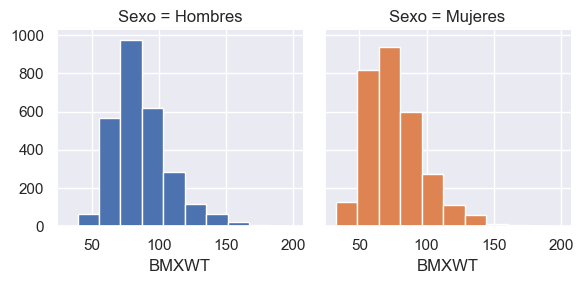

[Text(0.5, 1.0, 'Diagrama de cajas de peso según sexo')]

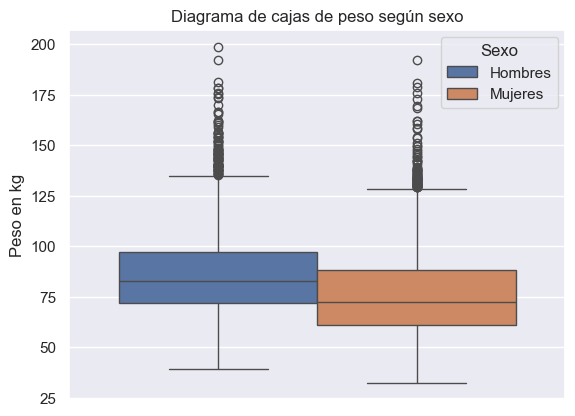

In [8]:
# Recodifica la variable de género
da["Sexo"] = da["RIAGENDR"].replace({1: "Hombres", 2: "Mujeres"})

dataset_plot = sns.FacetGrid(da, col="Sexo", hue="Sexo")
dataset_plot = dataset_plot.map(plt.hist, "BMXWT")
plt.show()

dataset_box = sns.boxplot(y="BMXWT", data=da, hue="Sexo")
dataset_box.set_ylabel("Peso en kg")
dataset_box.set(title="Diagrama de cajas de peso según sexo")

El histograma de peso para toda la muestra está sesgada hacia la derecha, sin diferencias marcardas en la distribución entre géneros. En el diagrama de cajas podemos observar que la media de peso en hombres es mayor que en mujeres.

También podemos construir tablas de frecuencia del tamaño del hogar para pesonas en cada categoría de raza/origen étnico ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)).

In [9]:
# Recodifica la variable de raza/origen étnico
da["RIDRETH1x"] = da["RIDRETH1"].replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 4: "Non-Hispanic Black", 5: "Other Race"})
da.groupby(["RIDRETH1x"])["DMDHHSIZ"].value_counts(normalize=True).unstack()

DMDHHSIZ,1,2,3,4,5,6,7
RIDRETH1x,,,,,,,
Mexican American,0.054028,0.191552,0.177800,0.181729,0.151277,0.120825,0.122790
Non-Hispanic Black,0.171149,0.248574,0.181744,0.147514,0.116544,0.061940,0.072535
Non-Hispanic White,0.194127,0.361066,0.159869,0.133225,0.091898,0.037520,0.022295
Other Hispanic,0.090667,0.214667,0.188000,0.208000,0.153333,0.085333,0.060000
Other Race,0.088790,0.245283,0.219756,0.187569,0.130966,0.052164,0.075472


Los blancos no hispanos tienen la mayor proporción de hogares de 2 personas de todas las demás categorías de raza/origen hispano. Podemos observar cómo las proporciones para las categorías mexicano-americanos y otros hispanos tienen frecuencias similares entre los tamaños de hogar de 2 a 4 en comparación con otras categorías de raza/origen hispano.

Podemos construir una tabla estratificada por una combinación de raza/origen hispano ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) y género ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), para ver cualquier diferencia en las medias de edad ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), peso ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)) y las primeras medidas de presión arterial sistólica ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1)).

In [10]:
da.groupby(["RIDRETH1x", "Sexo"])[["RIDAGEYR", "BMXWT", "BPXSY1"]].mean().unstack()

RIDAGEYR                 BMXWT                 BPXSY1  \
Sexo                  Hombres    Mujeres    Hombres    Mujeres     Hombres   
RIDRETH1x                                                                    
Mexican American    46.395789  46.173112  86.079095  77.350000  126.926407   
Non-Hispanic Black  47.144097  46.287250  89.095760  83.896734  131.007463   
Non-Hispanic White  52.404736  50.898901  90.093333  77.221397  126.242152   
Other Hispanic      48.298137  48.971963  85.954206  74.429176  127.132686   
Other Race          43.586433  44.479730  77.256291  65.314286  123.488152   

                                
Sexo                   Mujeres  
RIDRETH1x                       
Mexican American    121.905697  
Non-Hispanic Black  125.786311  
Non-Hispanic White  123.122685  
Other Hispanic      125.071605  
Other Race          119.826303

A través de las categorías de raza/origen hispano, la media más alta de edad corresponde a los blancos no hispanos; la media más alta de peso corresponde tanto a los blancos no hispanos como a los negros no hispanos; la media más alta de la primera medición de presión arterial sistólica corresponde a los negros no hispanos.

Vemos una diferencia notable entre hombres y mujeres para las medias de la variable peso (los blancos no hispanos presentan la mayor diferencia con 13.1 kg) y las mediciones de presión arterial sistólica (los negros no hispanos presentan la mayor diferencia con 5.2). No se observa una diferencia particularmente notable para la variable de edad entre las categorías de raza/origen hispano.

Podemos construir diagramas de dispersión para comparar la distribución de altura y peso por categorías de raza/origen hispano (columnas) y género (filas).

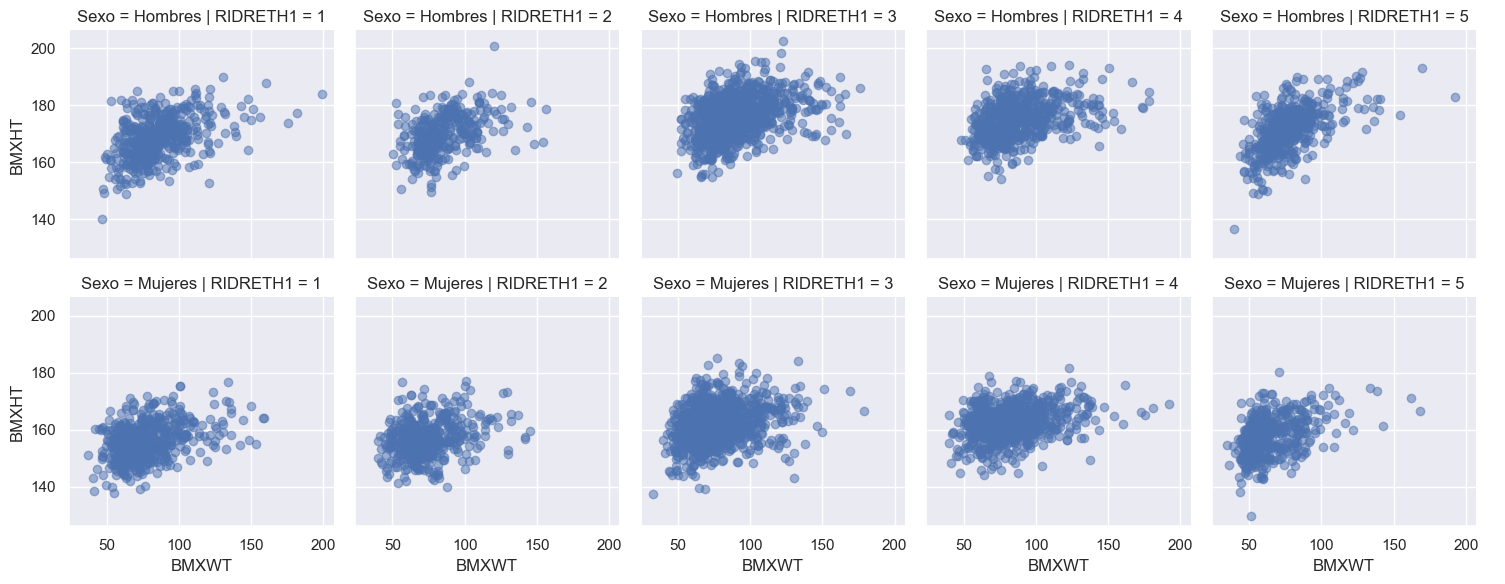

In [11]:
sns.FacetGrid(da, col="RIDRETH1", row="Sexo").map(plt.scatter, "BMXWT", "BMXHT", alpha=0.5).add_legend()

Hay una diferencia en las distribuciones de peso y altura entre hombres y mujeres en las categorías de raza/origen hispano, sin diferencias notables entre cada categoría de raza/origen hispano. Podemos observar cómo los blancos no hispanos y los negros no hispanos tienen una varianza de peso más alta que otras categorías de raza/origen hispano.

Podemos crear diagramas de violín para comparar la distribución de las primeras mediciones de presión arterial sistólica dentro de una serie de rangos de edad de 10 años, estratificados por género.

<Axes: xlabel='agegrp', ylabel='BPXSY1'>

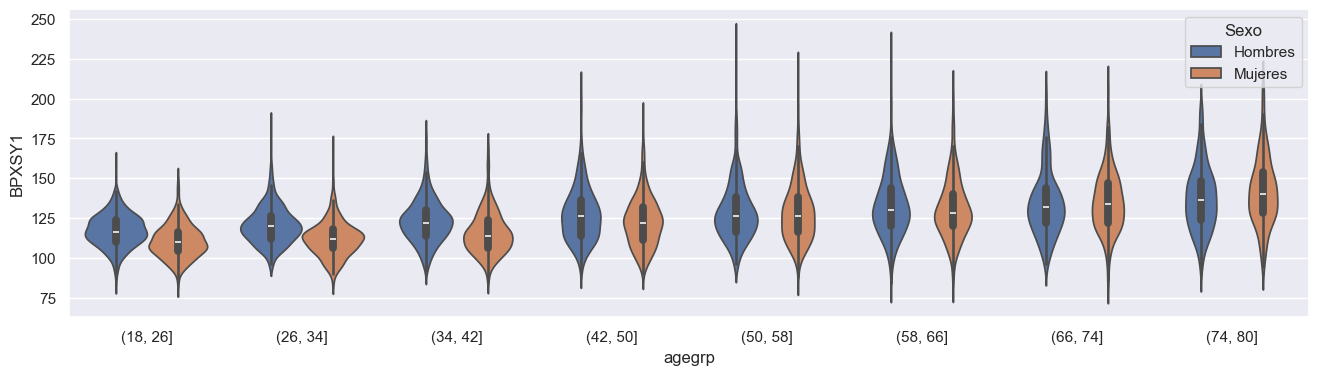

In [12]:
# Estratifica las edades a intérvalos de 10 años
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 26, 34, 42, 50, 58, 66, 74, 80])
plt.figure(figsize=(16, 4))
sns.violinplot(da, x="agegrp", y="BPXSY1", hue="Sexo")

A través de las franjas de edad de 10 años hay una tendencia ascendente en las medias de las primeras mediciones de presión arterial sistólica a medida que aumenta la edad, con una varianza más alta también. Los hombres tienen mediciones promedio más altas de la primera presión arterial sistólica que las mujeres en el espectro inferior de edad, pero la diferencia se reduce a medida que aumenta la edad, con una inversión de esta proporción en la última franja de edad.

## Análisis de inferencia

----------

Podemos determinar las proporciones y sus intérvalos de confianza del 95% (IC 95%) de hombres y mujeres que fuman ([SMQ020](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.htm#SMQ020)), así como el IC 95% para la diferencia entre proporciones de géneros.

In [13]:
# Preparación de datos, seleccionando por género y consumo de cigarrillos
females = da.query('RIAGENDR == 2')
males = da.query('RIAGENDR == 1')
female_smokers = females['SMQ020'] == 1
male_smokers = males['SMQ020'] == 1

# Función que calcula los IC para proporciones
def ProportionsCI(data, confidence):
    p_hat = np.mean(data)
    n = data.size
    z_multiplier = scipy.stats.norm.ppf(q = 1 - (1 - confidence) / 2)
    standard_error = np.sqrt(p_hat * (1 - p_hat) / n)
    lower_bound = p_hat - z_multiplier * standard_error
    upper_bound = p_hat + z_multiplier * standard_error
    return {"p_hat": p_hat, "n":n, "lower_bound":lower_bound, "upper_bound":upper_bound}

# Calcula la proporción de mujeres que fuman con su IC 95%
female_smokers_ci = ProportionsCI(female_smokers, 0.95)
print("La proporción e IC para las mujeres que fuman es (N={}) is {:.2f} ({:.2f}, {:.2f})".format(
    female_smokers_ci['n'],
    female_smokers_ci['p_hat'],
    female_smokers_ci['lower_bound'],
    female_smokers_ci['upper_bound']
))

# Calcula la proporción de hombres que fuman con su IC 95%
male_smokers_ci = ProportionsCI(male_smokers, 0.95)
print("La proporción e IC para los hombres que fuman es (N={}) is {:.2f} ({:.2f}, {:.2f})".format(
    male_smokers_ci['n'],
    male_smokers_ci['p_hat'],
    male_smokers_ci['lower_bound'],
    male_smokers_ci['upper_bound']
))

# Construye el intervalo de confianza para la diferencia entre las proporciones

# Calculando el error estándar de la diferencia
standard_error = np.sqrt(
    female_smokers_ci['p_hat'] * (1 - female_smokers_ci['p_hat']) / female_smokers_ci['n'] + 
    male_smokers_ci['p_hat'] * (1 - male_smokers_ci['p_hat']) / male_smokers_ci['n']
)

# Calculando el multiplicador z para el IC 95%
z_multiplier = scipy.stats.norm.ppf(q = 0.975)

# Calculando la diferencia de la proporción entre hombres y mujeres que fuman
difference = male_smokers_ci['p_hat'] - female_smokers_ci['p_hat']

# Calculando el límite inferior y superior del IC 95%
lower_bound = difference - z_multiplier * standard_error
upper_bound = difference + z_multiplier * standard_error
print("La diferencia en proporciones e IC para la diferencia de proporciones entre hombres y mujeres es {:.2f} ({:.2f}, {:.2f})".format(
  difference,
  lower_bound,
  upper_bound
))

La proporción e IC para las mujeres que fuman es (N=2976) is 0.30 (0.29, 0.32)
La proporción e IC para los hombres que fuman es (N=2759) is 0.51 (0.49, 0.53)
La diferencia en proporciones e IC para la diferencia de proporciones entre hombres y mujeres es 0.21 (0.18, 0.23)


Observamos que la proporción de hombres que fuman (51%, IC 95%: 49-53%) es mayor que la proporción de mujeres que fuman (30%, IC: 29-32%), sin intersección de los intérvalos de confianza al 95%. La diferencia entre dichas proporciones corresponde al 21%, IC 95%: 18-23%. Estos resultados son evidencia que dicha diferencia de proporciones podría ser estadísticamente significativa. 

Para confirmar dicha posibilidad, es importante también realizar una prueba de hipótesis. Antes de hacer nuestra prueba de hipótesis, es importante establecer nuestra hipótesis nula y nuestro nivel de significancia. En este caso, nuestra hipótesis nula es "no hay diferencia entre la proporción de consumo de cigarrillos entre géneros" con un nivel de significancia de 5% (0.05).

In [14]:
# Elimina los datos vacíos o no válidos
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
dx = da[["SMQ020x", "RIAGENDRx"]].dropna()

# Devuelve la frecuencia de fumadores por género
print("Hay {} hombres, de los cuales {} fuman".format(len(males), male_smokers.sum()))
print("Hay {} mujeres, de los cuales {} fuman".format(len(females), female_smokers.sum()))

# Devuelve las proporciones de fumadores por género
print("La proporción de hombres que fuman es {:.2f} mientras que".format(male_smokers_ci['p_hat']))
print("la proporción de mujeres que fuman es {:.2f}".format(female_smokers_ci['p_hat']))

# Filtra los dataframes por género y recodifica los Si/No a 1/0 para la prueba de hipótesis
smoker_females = dx.loc[dx["RIAGENDRx"] == "Female", "SMQ020x"].replace({"Yes": 1, "No": 0})
smoker_males = dx.loc[dx["RIAGENDRx"] == "Male", "SMQ020x"].replace({"Yes": 1, "No": 0})
ztest = sm.stats.ztest(smoker_males, smoker_females)
print("Prueba z para la diferencia en proporciones: z = {:.2f}, p = {:.5e}".format(ztest[0], ztest[1]))

Hay 2759 hombres, de los cuales 1413 fuman
Hay 2976 mujeres, de los cuales 906 fuman
La proporción de hombres que fuman es 0.51 mientras que
la proporción de mujeres que fuman es 0.30
Prueba z para la diferencia en proporciones: z = 16.42, p = 1.36246e-60


Observamos que el estadístico z es igual a 16.42, lo que significa que esta diferencia observada se desvía 16.42 errores estándares, una diferencia extrema de observar asumiendo que la hipótesis nula (no existe diferencia entre géneros) es verdadera. El valor p de esta prueba corresponde a 1.36246e-60 o p<0.05. Ya que el valor p es menor a nuestro nivel de significancia, rechazamos la hipótesis nula y tenemos evidencia a favor de una diferencia en proporciones de consumo de cigarrillos entre géneros.

Podemos calcular el IC 95% para la media de la primera y segunda presión arterial sistólica de cada individuo entre las edades 50 a 60 años. Considerando que estos parámetros son mediciones repetidas de los mismos individuos, la prueba t pareada es la prueba de elección para determinar si la diferencia entre las medias de las presiones arteriales es estadísticamente significativa.

En este caso nuestra hipótesis nula es "no existe diferencia entre las mediciones de la primera y segunda presión arterial entre los individuos de las edades 50 a 60 años".

In [16]:
# Filtra los datos para las edades 30 a 40 años
crit = da.loc[(da["RIDAGEYR"] >=50) & (da["RIDAGEYR"] <=60)]

# Calcula la media y el IC 95% para la primera medición de la presión arterial sistólica (BPXSY1)
sbp1 = crit["BPXSY1"].dropna()
sbp1_ci = sm.stats.DescrStatsW(sbp1).zconfint_mean()
print("El IC 95% para los datos de la primera presión sistólica es: {:.2f} ({:.2f}, {:.2f})".format(
        sbp1.mean(),
        sbp1_ci[0], 
        sbp1_ci[1]
    ))

# Calcula la media y el IC 95% para la segunda medición de la presión arterial sistólica (BPXSY2)
sbp2 = crit["BPXSY2"].dropna()
sbp2_ci = sm.stats.DescrStatsW(sbp2).zconfint_mean()
print("El IC 95% para los datos de la segunda presión sistólica es: {:.2f} ({:.2f}, {:.2f})".format(
        sbp2.mean(),
        sbp2_ci[0], 
        sbp2_ci[1]
    ))

# Calcula la diferencia entre las dos mediciones de la presión arterial sistólica
se_sbp1 = sbp1.std()/np.sqrt(len(sbp1)) 
se_sbp2 = sbp2.std()/np.sqrt(len(sbp2))
se_diff = np.sqrt(se_sbp1**2 + se_sbp2**2)
mean_diff = sbp1.mean() - sbp2.mean()
lcb_diff = mean_diff - 1.96*se_diff
ucb_diff = mean_diff + 1.96*se_diff

print("El IC 95% para la diferencia entre la primera y segunda medición de presión arterial sistólica es: {:.2f} ({:.2f}, {:.2f})".format(
        mean_diff,
        lcb_diff, 
        ucb_diff
    ))

# Selecciona las filas que contienen datos de la primera y segunda medición de la presión arterial sistólica
dx = crit[crit["BPXSY1"].notnull() & crit["BPXSY2"].notnull()]
first_systolic = dx["BPXSY1"]
second_systolic = dx["BPXSY2"]

# Calcula el valor p de la prueba t pareada
ttest = scipy.stats.ttest_rel(first_systolic, second_systolic)
print("El valor p de la prueba t pareada es: {:.5e}".format(ttest[1]))

El IC 95% para los datos de la primera presión sistólica es: 128.57 (127.41, 129.74)
El IC 95% para los datos de la segunda presión sistólica es: 128.18 (127.03, 129.32)
El IC 95% para la diferencia entre la primera y segunda medición de presión arterial sistólica es: 0.40 (-1.24, 2.03)
El valor p de la prueba t pareada es: 3.52773e-04


Observamos que existe una diferencia de 0.4 mmHg entre la primera y segunda medición de presión arterial sistólica, con un intérvalo de confianza que incluye 0. Pese a que nuestro valor p es menor a 0.05, no tenemos evidencia suficiente para rechazar la hipótesis nula ("no existe diferencia entre las mediciones de la primera y segunda presión arterial entre los individuos de las edades 50 a 60 años")

## Análisis de regresión

----------

Para poder realizar una regresión con Python, necesitamos primero preparar nuestros datos en base a nuestras variables de interés. Posteriormente, podemos realizar regresión lineal de la primera medición de presióna arterial sistólica como nuestra variable dependiente y la edad en años como variable independiente.

In [17]:
# Crea un conjunto de datos sin valores perdidos o vacíos para analizar la primera medición de presión arterial sistólica como el resultado
vars = ["RIDAGEYR", "RIAGENDR", "RIDRETH1", "BPXSY1", "BMXBMI", "SMQ020"]
db = da[vars].dropna()

m0 = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR", data=db)
r0 = m0.fit()
r0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     1522.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):          3.09e-293
Time:                        14:25:50   Log-Likelihood:                -22487.
No. Observations:                5347   AIC:                         4.498e+04
Df Residuals:                    5345   BIC:                         4.499e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.4739      0.619    165.512      0.000     101.260     103.688
RIDAGEYR       0.4695      0.012     39.017      0.000       0.446       0.493
==============================================================================
Omnibus:                      735.276   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1655.199
Skew:                           0.811   Prob(JB):                         0.00
Kurtosis:                       5.190   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A través de esta regresión lineal, podemos observar que por cada año adicional de edad, se esperaría un aumento de 0.5 mmHg en la presión arterial. Esta relación es estadísticamente significativa, ya que el valor p es menor a 0.05.

Otras variables de interés pueden ser el género y el origen étnico, las cuales podemos analizar tomando en cuenta todas las edades y luego divdiendo estos datos en dos grupos de edades diferentes: Personas con menos de 50 años y personas con 50 años o más. En este caso es importante tomar en cuenta el libro de códigos para la variable de origen étnico, [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [18]:
db["RIAGENDRx"] = db.RIAGENDR.replace({1: "Male", 2: "Female"})
print("Todas las edades:")
m1 = sm.GLM.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx + C(RIDRETH1)", data=db)
r1 = m1.fit()
print(r1.summary())

print("\nPersonas con menos de 50 años:")
m2 = sm.GLM.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx + C(RIDRETH1)", data=db[db.RIDAGEYR<50])
r2 = m2.fit()
print(r2.summary())

print("\nPersonas con 50 años o más:")
m3 = sm.GLM.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx + C(RIDRETH1)", data=db[db.RIDAGEYR>=50])
r3 = m3.fit()
print(r3.summary())

Todas las edades:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 BPXSY1   No. Observations:                 5347
Model:                            GLM   Df Residuals:                     5340
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                          255.90
Method:                          IRLS   Log-Likelihood:                -22408.
Date:                Sun, 18 Feb 2024   Deviance:                   1.3665e+06
Time:                        14:25:50   Pearson chi2:                 1.37e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2761
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           

Considerando que tenemos variables categóricas en nuestro modelo de regresión lineal, es importante identificar las referencias tomadas por el software. En este caso, la intersección corresponde a las categorías de "hombre" para la variable de género y "Mexicano-Americano" para la variable de origen étnico.

Para el grupo de edad mayor o igual a 50 años, observamos que el origen étnico "negro no hispano" tiene un coeficiente de 4.2 (IC 95% 1.8, 6.7). Es decir, para los individuos de origen étnico "negro no hispano" la primera medición de presión arterial sistólica se espera que sea 4.2 mmHg mayor, ajustado por edad y género. También observamos para la edad un coeficiente de 0.5 (IC 95% 0.4, 0.6), es decir, por cada año adicional de edad se espera que la primera medición de presión arterial sistólica aumente 0.5 mmHg, ajustado para género y origen étnico. Ambas variables independientes son estadísticamente significativas, ya que sus valores p son menores a 0.05.

Para los modelos donde se toman en cuenta todas las eadades, así como en el grupo menor a 50 años, los coeficientes de las variables edad y el origen étnico "negro no hispano" disminuyen un poco en comparación con el grupo de edad mayor o igual a 50 años pero sus intérvalos de confianza no contienen 0. Este hecho, junto con los valores p menores a 0.05 de estas variables, presentan suficiente evidencia para rechazar la hipótesis nula.

Destaca que el pseudo R cuadrado del modelo que toma en cuenta todas las edades (0.28) es mayor a de los modelos que dividen esta muestra en grupos de edades mayor o igual a 50 años y menores de 50 años (0.07 y 0.17 respectivamente). Esto es un indicativo de que el modelo que toma en cuenta todas las edades tiene una mejor relación lineal con la primera medición de presión arterial sistólica.

Considerando el modelo para el grupo mayor de 50 años, podemos estimar la diferencia en la media de la primera medición de la presión arterial sistólica para un individuo de 70 años con un individuo de 50 años, ajustando por género y origen étnico.

In [19]:
r3.params["RIDAGEYR"] * 20

10.202361066344995

Observamos que la diferencia en la media de la primera medición de presión arterial sistólica de un individuo de 70 años con un individuo de 50 años es de 10.2 mmHg según este modelo de regresión.

Para el modelo de regresión que incluye a todas las edades, podemos hacer un gráfico de regresión parcial para valorar la relación lineal entre la primera medición de presión arterial sistólica con la edad, ajustado por sexo y origen étnico.

48.05231037489102


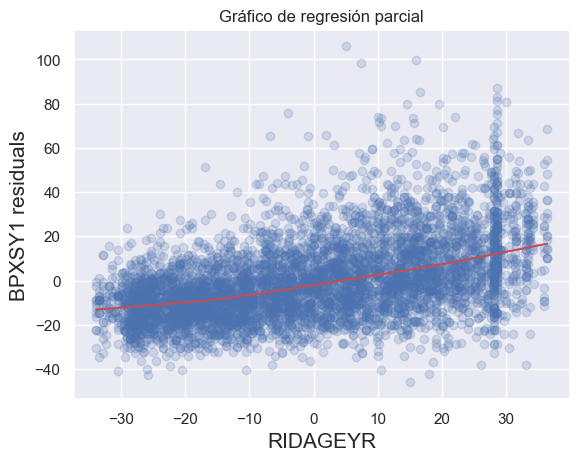

In [20]:
fig = r1.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
add_lowess(ax, frac=0.5)
ax.grid(True)
ax.set(title='Gráfico de regresión parcial')
print(da["RIDAGEYR"].mean())

Observamos que la relación entre la edad y la primera medición de presión arterial sistólica es aproximadamente lineal: Antes de la media de edad (48 años) la primera medición de presión arterial sistólica aumenta aproximadamente 14 unidades por cada 20 años, posterior a este punto la primera medición de presión arterial sistólica aumenta aproximadamente 26 unidades por cada 40 años. 

En base a este gráfico para este modelo de regresión específico, al ver la distribución de los residuales con la línea de regresión, observamos que existe una relación lineal de fuerte a moderada entre la primera medición de la presión arterial sistólica y la edad de los individuos ajustado por género y origen étnico.

Hasta este punto, hemos asumido que los datos provienen de un muestreo aleatorio simple. Sin embargo, NHANES es un conjunto de datos de muestreo conglomerado estratificado. Esto tiene consecuencias durante el análisis, ya que las muestras que provienen de un mismo conglomerado son similares entre sí. A través de un modelo de regresión marginal, podemos utilizar modelos de regresión que tomen en cuenta estas características de la muestra.

Este primer modelo de regresión marginal no tiene variables independiente, a fin de estimar el Coeficiente de Correlación Intraclase (CCI)

In [21]:
# Seleccionamos las columnas a utilizar y eliminamos las filas que tienen valores perdidos
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "SMQ020", "SDMVSTRA", "SDMVPSU"]
db = da[vars].dropna()

# Esta es la variable de los grupos
db["group"] = 10*db.SDMVSTRA + db.SDMVPSU

# Modelo de regresión marginal para determinar el Coeficiente de Correlación Intraclase (CCI)
m4 = sm.GEE.from_formula("BPXSY1 ~ 1", "group", cov_struct=sm.cov_struct.Exchangeable(), data=db)
r4 = m4.fit()
r4.cov_struct.summary()

'The correlation between two observations in the same cluster is 0.030'

En base al CCI podemos concluir que 3% de la varianza se encuentra entre conglomerados y el 97% está dentro de los conglomerados. Podemos realizar una regresión de modelo marginal, donde la primera medición de la presión arterial sistólica será nuestra variable dependiente y las variables edad, género y origen étnico serán nuestras variables independientes.

In [22]:
db["RIAGENDRx"] = db.RIAGENDR.replace({1: "Male", 2: "Female"})
m5 = sm.GEE.from_formula("BPXSY1 ~ RIAGENDRx + RIDAGEYR + C(RIDRETH1)", "group", cov_struct=sm.cov_struct.Exchangeable(), data=db)
r5 = m5.fit()
r5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                      BPXSY1   No. Observations:                 5401
Model:                                 GEE   No. clusters:                       30
Method:                        Generalized   Min. cluster size:                 111
                      Estimating Equations   Max. cluster size:                 234
Family:                           Gaussian   Mean cluster size:               180.0
Dependence structure:         Exchangeable   Num. iterations:                     9
Date:                     Sun, 18 Feb 2024   Scale:                         258.784
Covariance type:                    robust   Time:                         14:25:52
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.9729      0.949    106.405      0.000      99.113     102.833
RIAGENDRx[T.Male]     3.5625      0.414      8.596      0.000       2.750       4.375
C(RIDRETH1)[T.2]      0.1739      0.716      0.243      0.808      -1.229       1.577
C(RIDRETH1)[T.3]     -2.5784      0.747     -3.454      0.001      -4.042      -1.115
C(RIDRETH1)[T.4]      3.2063      0.825      3.887      0.000       1.590       4.823
C(RIDRETH1)[T.5]     -1.3434      0.794     -1.693      0.091      -2.899       0.212
RIDAGEYR              0.4698      0.018     26.244      0.000       0.435       0.505
==============================================================================
Skew:                          0.8461   Kurtosis:                       2.3364
Centered skew:                 0.8327   Centered kurtosis:              2.2624
==============================================================================
"""

Si comparamos este modelo de regresión marginal con el modelo previo de regresión lineal con las mismas variables y tomando en cuenta todas las edades, observamos que existe una mayor varianza en muchos de los coeficientes de regresión (evidenciado por los valores más altos de error estándar). 

Destaca que el coeficiente para el origen étnico "otras etnias, incluyendo multi-étnico" tiene un IC 95% que incluye 0 y un valor p valor a 0.05 en este modelo de regresión marginal, mientras que en el modelo lineal previo el IC 95% no incluía 0 y mostraba un valor p menor a 0.05. Esto es un ejemplo de la importancia de tomar en cuenta el tipo de muestra previo a realizar nuestros análisis, ya que podríamos interpretar de forma muy optimista los resultados y llegar a conclusiones incorrectas.

In [23]:
r5.cov_struct.summary()

'The correlation between two observations in the same cluster is 0.013'

Al determinar el CCI con este nuevo modelo, observamos que las variables agregadas son factores que pueden explicar el 1% de la varianza entre conglomerados y 99% dentro de los conglomerados. Esto significa que las variables independientes no están distribuidas de forma aproximadamente equitativa en todos los niveles de los conglomerados.